<a href="https://colab.research.google.com/github/raian621/FinalProjectNLP/blob/main/Copy_of_FinalProjectNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary-Based Sentiment Analysis

## CSCE 4290 - Introduction to Natural Language Processing

- Ryan Bell
- Farouq Siwoku

**Contents**
1. [Introduction](#scrollTo=NyWwimvyPOTi)
  - [1.1 Problem](#scrollTo=IzaaYyYzRAvB)
  - [1.2 Importance](#scrollTo=0aopY4JIRE6x)
  - [1.3 Dataset](#scrollTo=X7IAZFhXSmZH)
  - [1.4 Proposed Methodology](#scrollTo=efdTl80eRHmm)
  - [1.5 Project Management](#scrollTo=BblVXk1DSXbk)
2. [Implementation](#scrollTo=sY3kog91Q3az)
  - [2.1 Exploratory Data Analysis](#scrollTo=rmvhO7ncSbYr)
  - [2.2 Sentiment Analysis on Entire Passages](#scrollTo=TKJSjIK2OzMr)
    - [2.2.1 Aggregate Bag of Words](#scrollTo=opEbHPEJOMrn)
  - [2.3 Sentiment Analysis on Summaries](#scrollTo=RSm_uKq6QYiI)
    - [2.3.1 Summary Feature Engineering](#scrollTo=W_rR079PQ3Zf)
    - [2.3.2 Summarized Bag of Words](#scrollTo=laz-aTE3OfEK)
3. [Results](#scrollTo=H7TLZ7lIPUng)
4. [Conclusion](#scrollTo=MrV4glZJQ61_)



## 1. Introduction

### 1.1 Problem

What is the problem we want to solve, and a hypothesis
- PERFORMANCE: Improve the performance of sentiment analysis
- HYPOTHESIS: Maybe using a summary instead of the entire text for sentiment analysis will improve the accuracy of ML model's performance.

### 1.2 Importance

- Model could be used to predict the sentiment of news stories about a stock
- Model could also be used to predict the general opinion on a product or move made by a company
- Using summaries may result in a smaller corpora, and thus bag-of-words models may consume less memory
- etc.

### 1.3 Dataset

Explain the source of the dataset, how it was compiled, the features in the dataset, what features we're planning to use, etc.

We're using the Yelp dataset from Kaggle https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_review.json. or https://www.yelp.com/dataset.

The Yelp dataset contains 6,990,280 user reviews of businesses. We will only use the text content and the star rating of each review. We will perform summarization on the text of each review as a form of feature extraction and also use a bag-of-words model to extract features from the text. The star rating of each review is the target that we will try to predict, which consists of 5 classes corresponding to the amount of stars each review was given on Yelp's site.

### 1.4 Proposed Methodology

Write about what models we'll use, what combination of solutions (sentiment analysis and summarization in this case) we'll employ, what features we'll use, and what kind of cross validation / train test split we'll utilize.

models:
- Summarization:
  - Some Generative Pre-trained Transformer (GPT) model(s)
  - Maybe a naive summary of just the set of the most common $N$ words?
- Sentiment Analysis:
  - Bag of Words:
    - Naive Bayes
    - Logistic Regression
  - Word Embeddings
    - Some Bidirectional Encoder Representations from Transformer (BERT) model(s)

Summary -> Sentiment Analysis = Better Accuracy?

### Validation

We will use 5-fold cross validation to test our hypothesis that sentiment analysis on a summarized piece of text predicts the sentiment more accurately than simply performing sentiment analysis on entire text.

### Summarization

Pegasus model :::: ? Generates abstractive summaries using a transformer architecture? We will use Google's Pegasus model to generate a summary of each review as a form of feature extraction.

### Sentiment Analysis

We will use Naive Bayes, Decision Tree, and Logistic regression models with a bag-of-words representation of each entry in the corpora and also a variant of the BERT model to perform sentiment analysis on each review.

### 1.5 Project Management


Explain how the project was organized I guess. The rubric isn't clear on what this means

## 2. Implementation

In [ ]:
%pip install --no-cache-dir transformers sentencepiece torch tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 202.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 117.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 155.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 115.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 179.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 154.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 182.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 163.5 MB/s eta 0:00:00


In [ ]:
# imports and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from os import path
import time

tqdm.pandas()

# natural language processing tools
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# metrics, feature extraction, and train-test splitting
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer

# "classic" machine learning models for classification:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# transformers pretrained models
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# pytorch
import torch
TORCH_DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# constants
ALL_REVIEWS_JSON_PATH = 'yelp_academic_dataset_review.json'
SOME_REVIEWS_CSV_PATH = 'yelp_reviews.csv'
SOME_REVIEWS_WITH_SUMMARIES_CSV_PATH = 'yelp_reviews_with_summaries.csv'
TARGET_REVIEW_COUNT = 10000 # only use a relatively small subset of the almost 7 million reviews

# results dataframe
RESULTS = pd.DataFrame(columns=['Approach', 'F1-Score', 'Precision', 'Recall', 'Accuracy', 'Time to Train', 'Time to Test'])
BOW_TRAIN_TIME = 0 # how long it took to generate bag-of-words for training sets
BOW_TEST_TIME = 0 # how long it took to generate bag-of-words for testing sets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 2.1 Exploratory Data Analysis

Load the dataset and make some fancy graphs.

In [ ]:
df = pd.DataFrame()

if not path.exists(SOME_REVIEWS_CSV_PATH) and not path.exists(SOME_REVIEWS_WITH_SUMMARIES_CSV_PATH):
    chunks = []
    with open(ALL_REVIEWS_JSON_PATH, 'rb') as file:
        reader = pd.read_json(file, orient='records', lines=True, dtype={
            'stars': np.int8,
            'useful': np.int8,
            'funny': np.int8,
            'cool': np.int8
        }, chunksize=1000)

        for chunk in tqdm(reader, total=6991):
            reduced_chunk = chunk.drop(columns=['review_id', 'user_id', 'useful','funny', 'cool', 'business_id', 'date'])
            chunks.append(reduced_chunk)

    df = pd.concat(chunks, ignore_index=True)
    df['text'] = df['text'].apply(lambda x: x.replace('\r', ' '))
    del chunks

In [ ]:
if not df.empty:
    star_counts = df['stars'].value_counts().sort_index()
    print(star_counts)

    ax = star_counts.plot(
        kind='bar',
        title='Count of Reviews by Stars'
    )
    ax.set_xlabel('Review Stars')
    ax.set_ylabel('Count')
    plt.show()

In [ ]:
if not df.empty:
    groups = df.groupby(['stars'], as_index=True)
    counts = {rating:groups.count()['text'][rating] for rating in range(1, 6)}
    total_count = df.shape[0]
    frequencies = {rating:(count/total_count) for rating, count in counts.items()}
    sampled_counts = {}

    review_count = 0
    for rating, count in counts.items():
        sampled_counts[rating] = TARGET_REVIEW_COUNT // 5
        review_count += sampled_counts[rating]

    remainder = TARGET_REVIEW_COUNT - review_count

    for rating in np.random.randint(low=1, high=6, size=remainder):
        sampled_counts[rating] += 1

    df_sampled = []
    for rating, count in sampled_counts.items():
        df_sampled.append(groups.get_group((rating,)).sample(count))

    df = pd.concat(df_sampled, ignore_index=True)
    df.to_csv(SOME_REVIEWS_CSV_PATH, index=False)

    ax = df['stars'].value_counts().sort_index().plot(
        kind='bar',
        title='Count of Reviews by Stars'
    )
    ax.set_xlabel('Review Stars')
    ax.set_ylabel('Count')
    plt.show()

In [ ]:
if df.empty and not path.exists(SOME_REVIEWS_WITH_SUMMARIES_CSV_PATH):
    df = pd.read_csv(SOME_REVIEWS_CSV_PATH)

    ax = df['stars'].value_counts().sort_index().plot(
        kind='bar',
        title='Count of Reviews by Stars'
    )
    ax.set_xlabel('Review Stars')
    ax.set_ylabel('Count')
    plt.show()

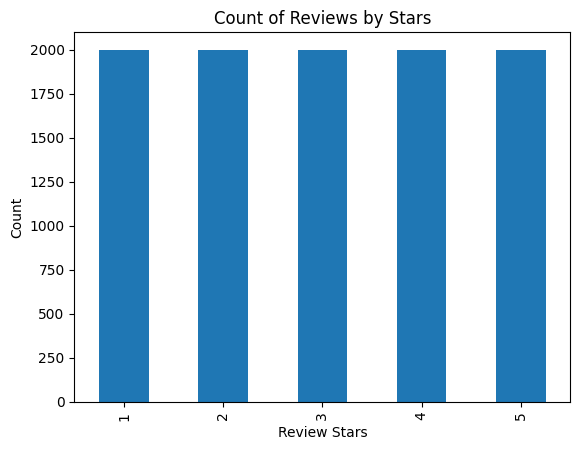

In [ ]:
if df.empty:
    df = pd.read_csv(SOME_REVIEWS_WITH_SUMMARIES_CSV_PATH, skipinitialspace=True)

    ax = df['stars'].value_counts().sort_index().plot(
        kind='bar',
        title='Count of Reviews by Stars'
    )
    ax.set_xlabel('Review Stars')
    ax.set_ylabel('Count')
    plt.show()

### 2.2 Sentiment Analysis on Entire Passages

In [ ]:
ps = PorterStemmer()
def stem_tokenizer(text):
  """
  removes stopwords, tokenizes the text, and lemmatizes each token
  """
  words = word_tokenize(text)
  stemmed_words = []
  for word in words:
    word_lower = word.lower()
    if word_lower not in stopwords.words('english'):
      stemmed_words.append(word_lower)
  return stemmed_words


def get_scores(y_pred, y_target):
  return {
    'f1-score': f1_score(y_target, y_pred, average='macro'),
    'precision': precision_score(y_target, y_pred, average='macro'),
    'recall': recall_score(y_target, y_pred, average='macro'),
    'accuracy': accuracy_score(y_target, y_pred)
  }


def print_results(scores, confusion_matrix, times):
  print('Training time:', times[0])
  print('Testing  time:', times[1])
  print()

  print('f1-score: ', scores['f1-score'])
  print('precision:', scores['precision'])
  print('recall:   ', scores['recall'])
  print('accuracy: ', scores['accuracy'])

  if confusion_matrix:
    cm = confusion_matrix[0]
    plt.figure(figsize=(9,9))
    sns.heatmap(
      cm,
      annot=True,
      fmt='d',
      linewidths=.5,
      square=True,
      cmap='Blues_r',
      xticklabels=[1, 2, 3, 4, 5],
      yticklabels=[1, 2, 3, 4, 5],
    )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(scores['accuracy'])
    plt.title(title, size=15)


def create_bow_kfolds(X, folds):
  global BOW_TRAIN_TIME, BOW_TEST_TIME
  BOW_TRAIN_TIME, BOW_TEST_TIME = 0, 0

  bows = []

  for fold in tqdm(folds, total=5):
    train_idx, test_idx = fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    # create bag of words representation:
    # cv = CountVectorizer(tokenizer=stem_tokenizer)
    cv = CountVectorizer()
    start = time.time()
    bow_train = cv.fit_transform(X_train)
    BOW_TRAIN_TIME += time.time() - start

    start = time.time()
    bow_test = cv.transform(X_test)
    BOW_TEST_TIME += time.time() - start

    bows.append((bow_train, bow_test))

  return bows


def cross_validate_bow(bow, y, clf, folds):
  global BOW_TRAIN_TIME, BOW_TEST_TIME

  total_cm = np.zeros(shape=(5,5), dtype=np.int32)
  total_scores = {}
  training_time = BOW_TRAIN_TIME
  testing_time = BOW_TEST_TIME

  for i, fold in tqdm(enumerate(folds), total=5):
    train_start = time.time()
    train_idx, test_idx = fold
    bow_train, bow_test = bow[i]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # train and test the model
    start = time.time()
    clf.fit(bow_train, y_train)
    training_time += time.time() - start

    start = time.time()
    y_pred = clf.predict(bow_test)
    testing_time += time.time() - start

    scores = get_scores(y_pred, y_test)
    cm = confusion_matrix(y_test, y_pred)

    for name, score in scores.items():
      total_scores[name] = total_scores.get(name, 0) + score

    total_cm = total_cm + cm

  total_scores = {name:score/5 for name, score in total_scores.items()}

  return total_scores, total_cm, (training_time, testing_time)


def record_results(scores, times, approach):
  global RESULTS

  RESULTS = pd.concat(
    [
      RESULTS,
      pd.DataFrame([{
        'Approach': approach,
        'F1-Score': scores['f1-score'],
        'Precision': scores['precision'],
        'Recall': scores['recall'],
        'Accuracy': scores['accuracy'],
        'Time to Train': times[0],
        'Time to Test': times[1],
      }])
    ],
    ignore_index=True
  )

#### 2.2.1 Aggregate Bag of Words

In [ ]:
X, y = df.drop(columns=['stars']), df['stars']

In [ ]:
sgkf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
folds = []
for train_idx, test_idx in sgkf.split(X['text'], y):
    folds.append((train_idx.copy(), test_idx.copy()))

In [ ]:
# create 5 bag of words for each fold based on entire reviews
bow = create_bow_kfolds(X['text'], folds)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Training time: 5.071718692779541
Testing  time: 1.1628141403198242

f1-score:  0.508631950148928
precision: 0.5262969097229031
recall:    0.5069
accuracy:  0.5069


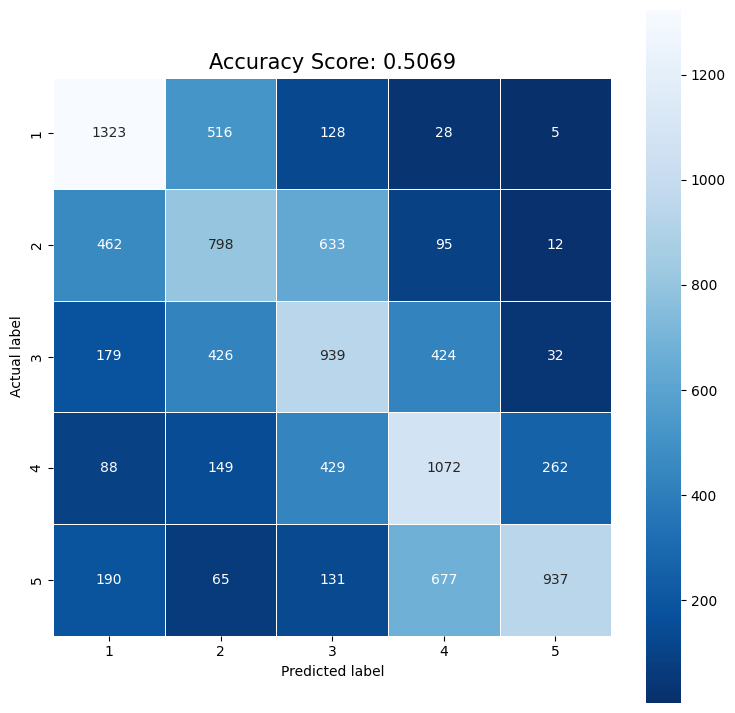

In [ ]:
nb = MultinomialNB()
scores, cm, times = cross_validate_bow(bow, y, nb, folds)

print_results(scores, (cm,), times)
record_results(scores, times, 'Naive Bayes')

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training time: 31.581891298294067
Testing  time: 1.1678228378295898

f1-score:  0.5294195990674964
precision: 0.5288654079544669
recall:    0.5303000000000001
accuracy:  0.5302999999999999


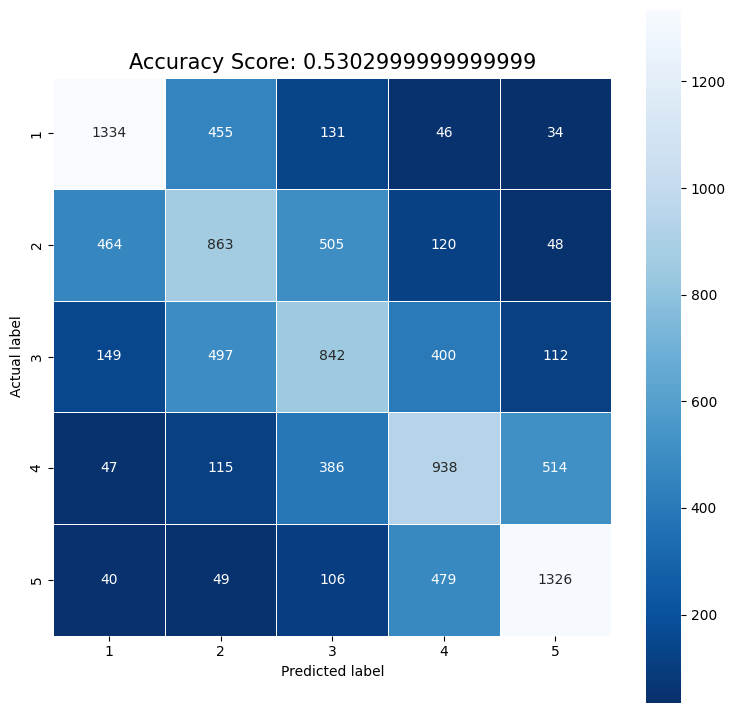

In [ ]:
lgc = LogisticRegression()
scores, cm, times = cross_validate_bow(bow, y, lgc, folds)

print_results(scores, (cm,), times)
record_results(scores, times, 'Logistic Regression')

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup

model_name = 'bert-base-uncased'
bert_model = BertForSequenceClassification.from_pretrained(model_name)
bert_tokenizer = BertTokenizer.from_pretrained(model_name, padding=True, truncation=True, max_length=512)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

model = nn.Sequential()

In [ ]:
input_ids = []
attn_masks = []

for text in tqdm(df['text'], total=df.shape[0]):
  encoded = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=512,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
  ).to(TORCH_DEVICE)

  input_ids.append(encoded['input_ids'])
  attn_masks.append(encoded['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attn_masks = torch.cat(attn_masks, dim=0)
labels = torch.tensor(y.values)

In [ ]:
dataset = TensorDataset(input_ids, attn_masks, labels)
train_dataset, val_dataset = dataset[folds[0][0]], dataset[folds[0][1]]
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=32
)
val_dataloader = DataLoader(
    val_dataset,
    sampler=RandomSampler(val_dataset),
    batch_size=32
)

In [ ]:
from torch.optim import AdamW

epochs = 4

optimizer = AdamW(bert_model.parameters(), lr=1e-5)
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(TORCH_DEVICE)

In [ ]:
from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

for epoch in range(epochs):
  print(f'Epoch {epoch + 1}/ {epochs}')
  print('-'*15)
  train_acc, train_loss = train_model(model, train_dataloader, loss_fn, optimizer, TORCH_DEVICE, scheduler, len(train_dataset))
  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(model, val_dataloader, loss_fn, TORCH_DEVICE, len(val_dataset))
  print(f'Val loss {val_loss} accuracy {val_acc}')

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc>best_accuracy:
      torch.save(model.state_dict(), 'best_model_state.bin')
      best_accuracy = val_acc


In [ ]:
def predict_sentiment(text):
  tokens = bert_tokenizer.encode(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length').to(TORCH_DEVICE)
  result = bert_model(tokens)

  return int(torch.argmax(result.logits))+1

y_pred = X['text'].progress_apply(predict_sentiment)

  0%|          | 0/10000 [00:00<?, ?it/s]

Training time: 0
Testing  time: 0

f1-score:  0.3584093946609929
precision: 0.5571528135489995
recall:    0.3987
accuracy:  0.3987


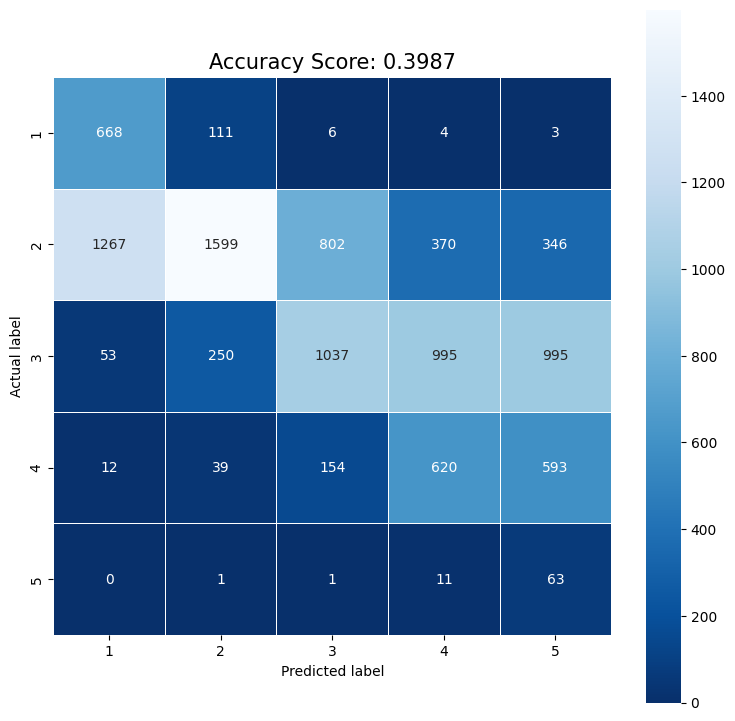

In [ ]:
scores = get_scores(y_pred, y)
cm = confusion_matrix(y_pred, y)

print_results(scores, (cm,), (0, 0))

### 2.2 Sentiment Analysis on Summaries

Generate a bag of words representative of the entire corpus:

#### 2.3.1 Summary Feature Engineering

Generate the summaries for each passage of text that we can use as a "summarized" corpora

In [ ]:
%pip install  --no-cache-dir transformers sentencepiece torch tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from tqdm.auto import tqdm
import torch

Summary Generation Function

In [ ]:
def generate_summary(text, tokenizer, model):
    model.to(TORCH_DEVICE)
    inputs = tokenizer(
        text,
        return_tensors="pt",
        max_length=1024,
        truncation=True,
        padding="max_length",
    ).to(TORCH_DEVICE)
    summary_ids = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=150,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True,
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [ ]:
if not path.exists(SOME_REVIEWS_WITH_SUMMARIES_CSV_PATH):
    model_ckpt = "google/pegasus-cnn_dailymail"
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt, use_fast=False)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

    # generate summaries
    df["summary"] = df["text"].progress_apply(
        lambda x: generate_summary(x, tokenizer, model)
    )

    df.to_csv(SOME_REVIEWS_WITH_SUMMARIES_CSV_PATH, index=False)

Analyzing the Summaries

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

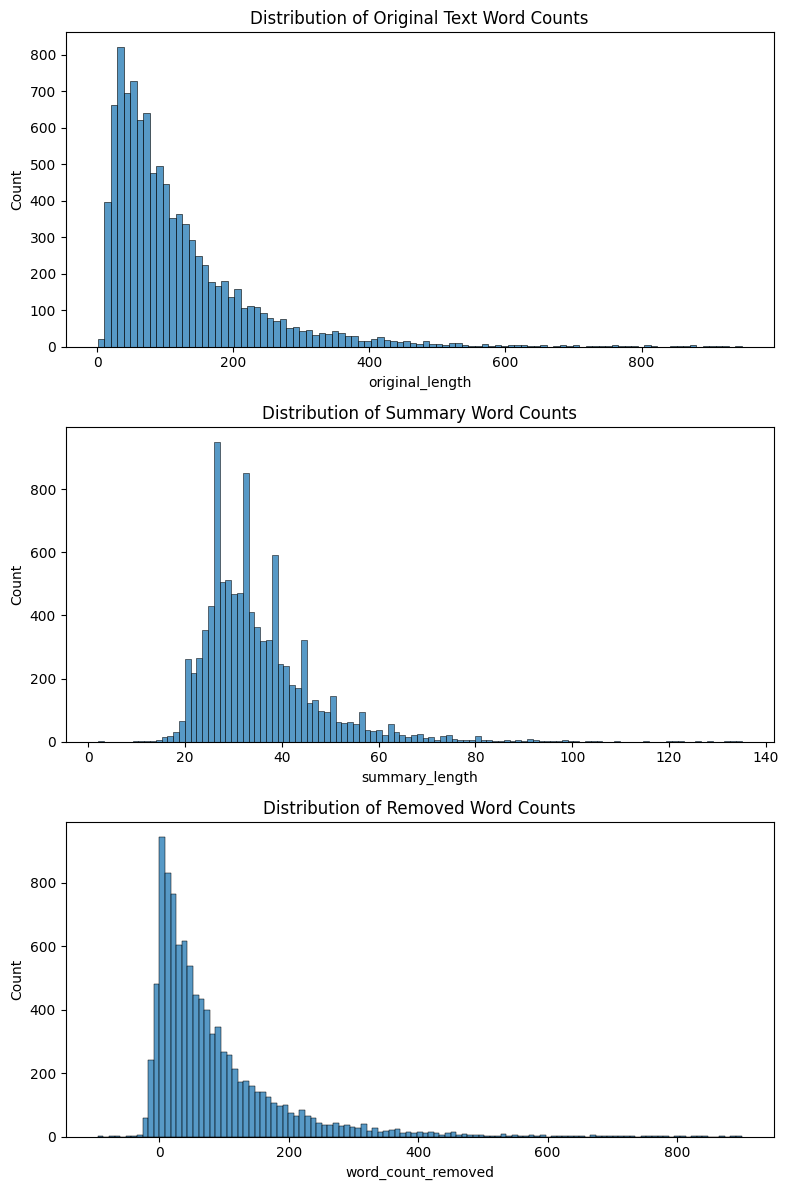

In [ ]:
# Calculate the length of the original texts and their summaries
df['original_length'] = df['text'].progress_apply(lambda x: len(x.split(' ')))
df['summary_length'] = df['summary'].progress_apply(lambda x: len(x.split(' ')))
df['word_count_removed'] = df['original_length'] - df['summary_length']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
ax[0].set_title('Distribution of Original Text Word Counts')
sns.histplot(df['original_length'], ax=ax[0])
ax[1].set_title('Distribution of Summary Word Counts')
sns.histplot(df['summary_length'], ax=ax[1])
ax[2].set_title('Distribution of Removed Word Counts')
sns.histplot(df['word_count_removed'], ax=ax[2])
plt.tight_layout()
plt.show()

Visualization

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['original_length'], label='Original Length')
plt.bar(df.index, df['summary_length'], label='Summary Length', alpha=0.7)
plt.ylabel('Length of Text')
plt.title('Comparison of Original Text Length to Summary Length')
plt.legend()
plt.show()

KeyboardInterrupt: 

#### 2.3.2 Summarized Bag of Words

In [ ]:
# create 5 bag of words for each fold based on the generated summaries
bow = create_bow_kfolds(X['summary'], folds)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Training time: 3.6174001693725586
Testing  time: 0.7320618629455566

f1-score:  0.45045794418222396
precision: 0.45852026206038776
recall:    0.4534999999999999
accuracy:  0.4535


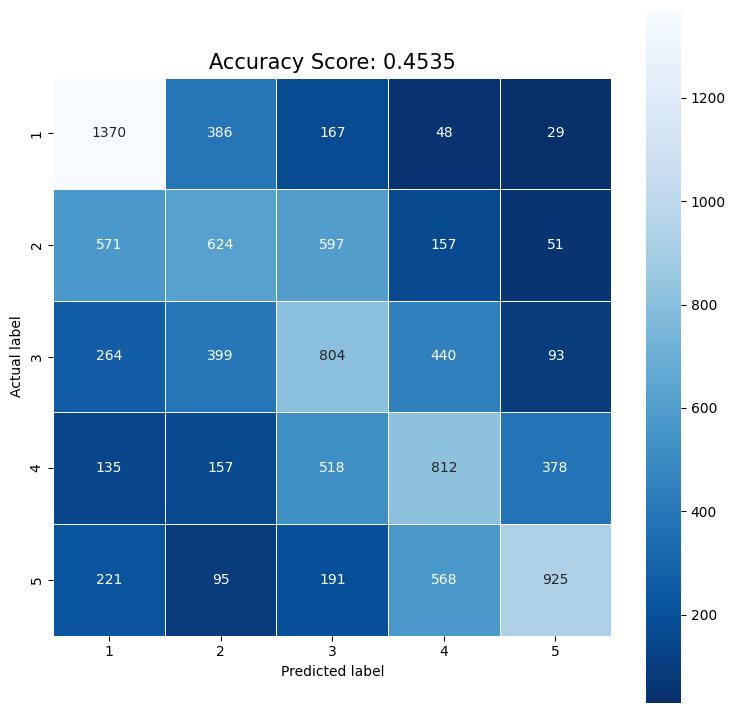

In [ ]:
nb = MultinomialNB()
scores, cm, times = cross_validate_bow(bow, y, nb, folds)

print_results(scores, (cm,), times)
record_results(scores, times, 'Naive Bayes on Summaries')

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training time: 21.442148447036743
Testing  time: 0.7344529628753662

f1-score:  0.43336785033889536
precision: 0.43304700716475947
recall:    0.4342
accuracy:  0.4342


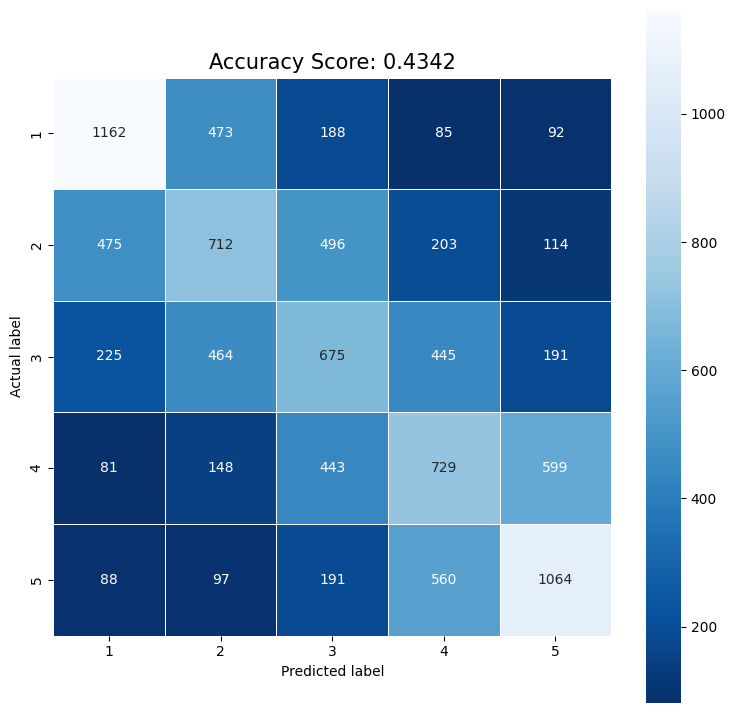

In [ ]:
lgc = LogisticRegression()
scores, cm, times = cross_validate_bow(bow, y, lgc, folds)

print_results(scores, (cm,), times)
record_results(scores, times, 'Logistic Regression on Summaries')

  0%|          | 0/10000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training time: 0
Testing  time: 0

f1-score:  0.13930195357317693
precision: 0.3582701846437433
recall:    0.2465
accuracy:  0.2465


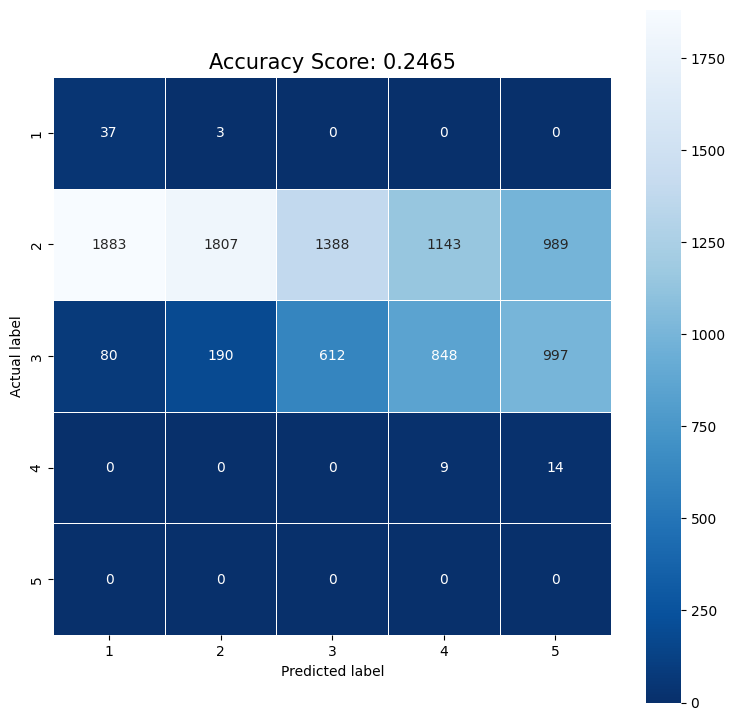

In [ ]:
y_pred = X['summary'].progress_apply(predict_sentiment)
scores = get_scores(y_pred, y)
cm = confusion_matrix(y_pred, y)

print_results(scores, (cm,), (0, 0))

## 3. Results

Show the final metrics for each model / combination of models

In [ ]:
RESULTS

,Approach,F1-Score,Precision,Recall,Accuracy,Time to Train,Time to Test
0,Naive Bayes,0.508632,0.526297,0.5069,0.5069,6.213537,1.691745
1,Logistic Regression,0.529420,0.528865,0.5303,0.5303,47.936432,1.705142


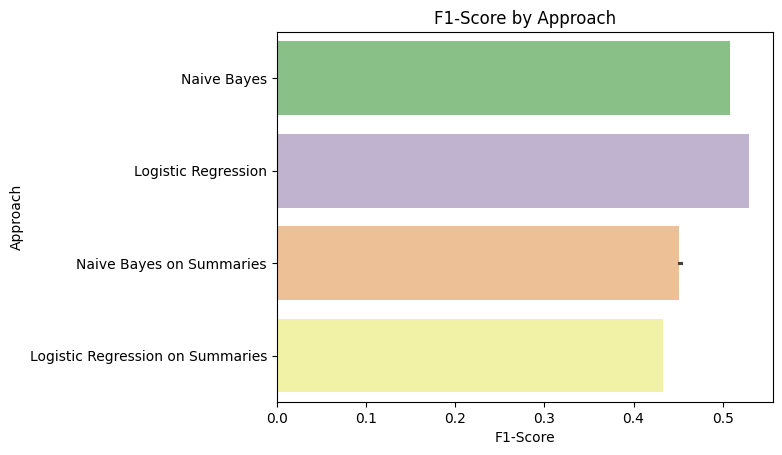

In [ ]:
fig, ax = plt.subplots()

ax.set_title('F1-Score by Approach')
sns.barplot(RESULTS, y='Approach', x='F1-Score', orient='h', hue='Approach', ax=ax, palette='Accent')
plt.show()

## 4. Conclusion


Conclude with a conclusion in the concluding paragraph